## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Lisandro Robles

***
## Estimación espectral


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

In [2]:
#####################################################
# Paquetes necesarios para realizar el ejercicio #1 #
#####################################################

#Paquetes estándar

#Paquete numérico
import numpy as np
#Paquete gráfico
import matplotlib.pyplot as plt
import matplotlib as mpl
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)
#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_family = 'Ubuntu'
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})
#Paquete de manejo de datos
from pandas import DataFrame
#Paquete para mostrar el dataframe
from IPython.display import HTML

#Paquete propios

#Paquete que implementa la clase generador de señales
import pdsmodulos.signal_generator as gen
#Paquete que implementa la clase analizador de espectro y los metodos de estimacion espectral
import pdsmodulos.spectrum_analyzer as sa


# Estimador periodograma

Para verificar las propiedades del estimador periodograma se propone el siguiente experimento. Se genera una cantidad fija de $S$ realizaciones de ruido blanco gaussiano de varianza $\sigma^{2} = 2$. Se observa a que valores convergen el sesgo y la varianza del estimador periodograma al aumentar la cantidad de muestras $N$ de cada realización.

In [3]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.arange(20,1221,dtype = int)

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

In [4]:
#Aca se almacenaran los resultados
tus_resultados = []
sesgos = np.zeros([np.size(N),],dtype = float)
varianzas = np.zeros([np.size(N),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for Ni in N:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,Ni)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    var = 2
    s = np.sqrt(var)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Estimador periodograma
    (f,Sxm,Sxv) = sa.periodograma(x,fs)

    #Calculo el area de ese espectro "promedio"
    #El area de la psd da la potencia
    valor_esperado = (np.mean(Sxm))
    sesgo = valor_esperado - np.power(s[0,0],2)

    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(sesgo),str(varianza)])

    #Sesgos
    sesgos[j] = sesgo

    #Varianzas
    varianzas[j] = varianza

    #Aumento el contador
    j = j + 1

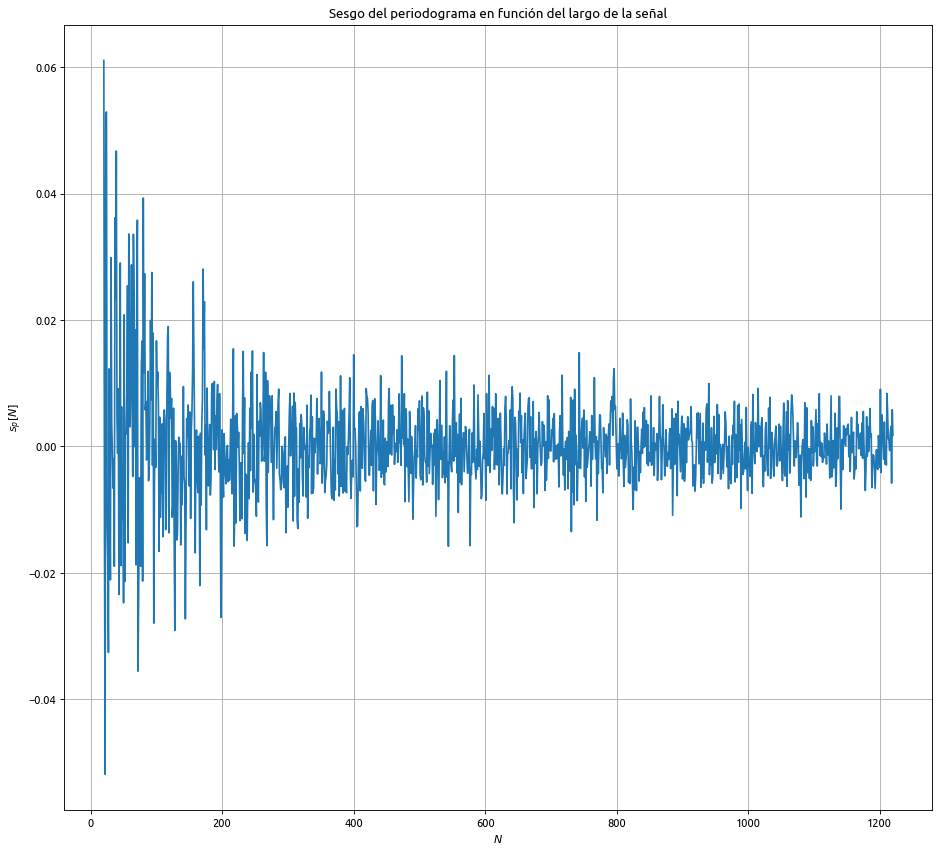

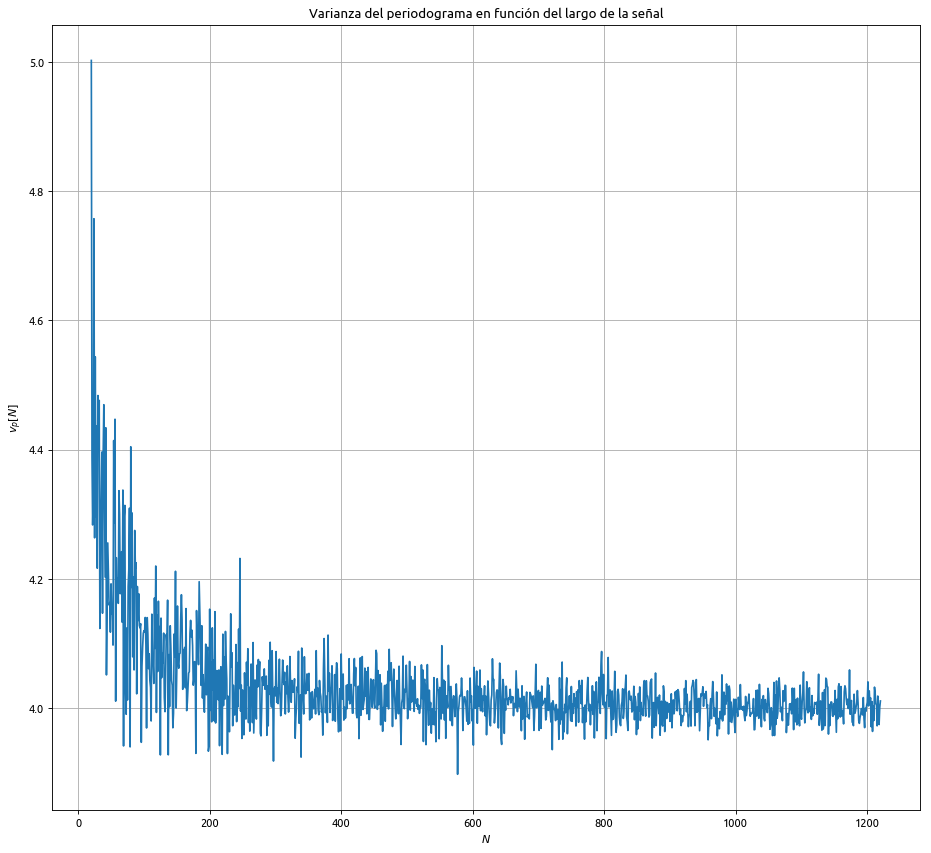

In [5]:
#######################################
# Presentación gráfica de resultados  #
#######################################

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,sesgos)
plt.title('Sesgo del periodograma en función del largo de la señal')
plt.ylabel('$s_{p}[N]$')
plt.xlabel('$N$')
#plt.axis('tight')
plt.grid()
plt.show()

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,varianzas)
plt.title('Varianza del periodograma en función del largo de la señal')
plt.ylabel('$v_{p}[N]$')
plt.xlabel('$N$')
#plt.axis('tight')
plt.grid()
plt.show()

In [6]:
########################################
# Presentación analítica de resultados #
########################################

df = DataFrame(tus_resultados[::120], columns=['$s_P$', '$v_P$'],index=N[::120])

HTML(df.to_html())


Del análisis de los resultados se ve que el periodograma es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{p} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras la varianza del periodograma no tiende a cero:

\begin{equation}
\lim_{N\to\infty} v_{p} = \sigma^{4} = 4 
\end{equation}

De esto último se puede concluir que a partir de cierta ventana de registro $N$, el estimador periodograma tiene varianza contante igual a $\sigma^4$ y no puede reducirse aumentando $N$.

De estas dos propiedades se puede concluir que el periodograma es un estimador incosistente de la potencia de señal $\sigma^{2}$.


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

# Estimador periodograma de Bartlett

## En función de la ventana de registro N

En este experimento se genera una cantidad fija de $S = 500$ realizaciones de ruido blanco gaussiano de varianza $\sigma^{2} = 2$. Se observa a que valores convergen el sesgo y la varianza del estimador periodograma de Bartlett al aumentar la cantidad de muestras $N$ y mantener una longitud fija de bloque $L = 16$ (es decir, la cantidad de bloques $K = \frac{N}{L}$ que se promedian aumenta con $N$).

In [27]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.arange(20,1221,dtype = int)

#Largo de cada bloque promediado
L = 16

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

In [28]:
    #Aca se almacenaran los resultados
    tus_resultados = []
    sesgos = np.zeros([np.size(N),],dtype = float)
    varianzas = np.zeros([np.size(N),],dtype = float)
    
    #Contador
    j = 0
    
    #Para cada largo de señal
    for Ni in N:
        
        #Cantidad de bloques
        k = int(np.floor(Ni/L))
        
        #Enciendo el generador de funciones
        generador = gen.signal_generator(fs,Ni)
                
        #Lista en que alamacenre las distribuciones para cada realizacion
        dist = []
        
        #Distribucion elegida para cada realizacion (todas normales)
        for i in range(0,S):
            dist.append("normal")
        
        #Media - Todas las realizaciones de media 0
        u = np.zeros((S,1),dtype = float)
        
        #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
        var = 2
        s = np.sqrt(var)*np.ones((S,1),dtype = float)
        
        #Llamo al metodo que genera ruido blanco
        #Genera una matriz de NxS, donde N = Filas y S = Columnas
        (t,x) = generador.noise(dist,u,s)
        
        #Estimador periodograma
        (f,Sxm,Sxv) = sa.bartlett(x,fs,nsect = k)
        
        #Calculo el area de ese espectro "promedio"
        #El area de la psd da la potencia
        valor_esperado = (np.mean(Sxm))
        sesgo = valor_esperado - np.power(s[0,0],2)

        
        #Calculo el area de eso
        #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
        varianza = (np.mean(Sxv))
 
        #Almaceno los resultados para esta largo de señal
        tus_resultados.append([str(sesgo),str(varianza),str(resolucion)])
        
        #Sesgos
        sesgos[j] = sesgo
        
        #Varianzas
        varianzas[j] = varianza
        
 
        
        #Aumento el contador
        j = j + 1

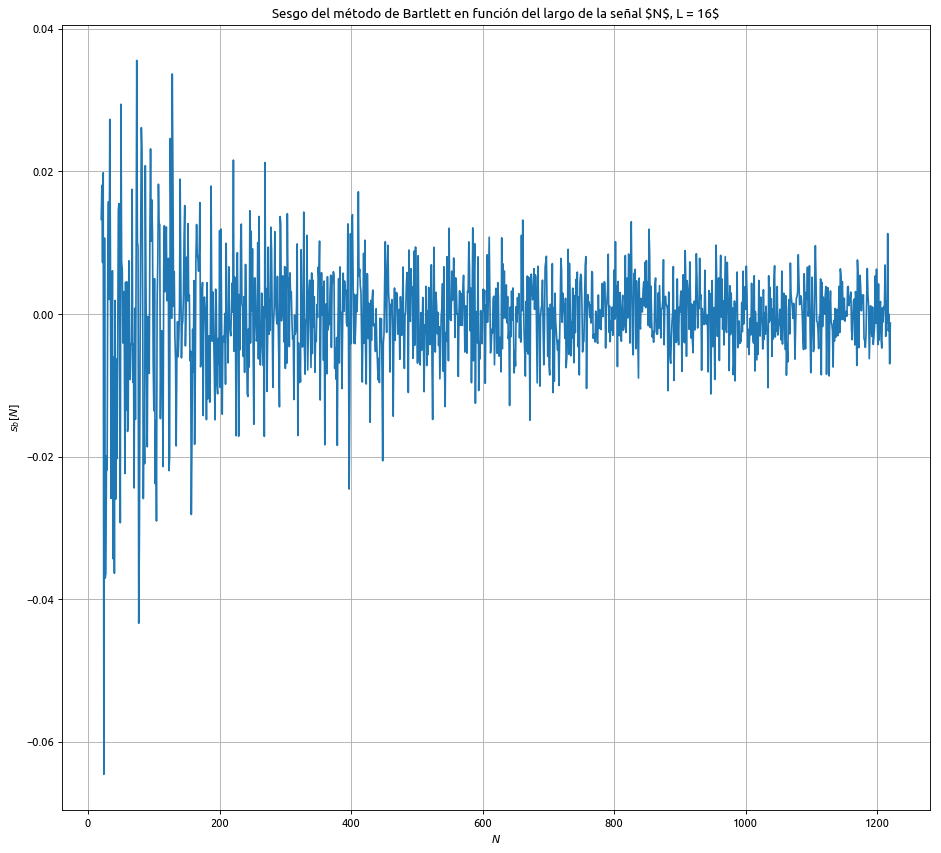

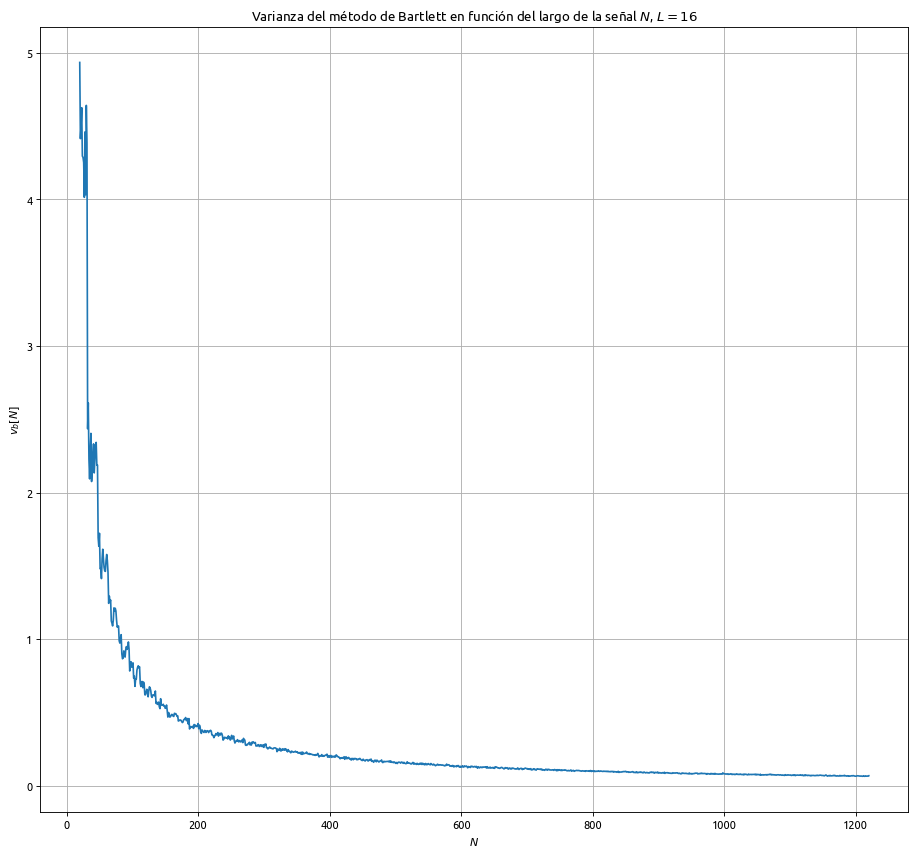

In [29]:
#Presentación gráfica de resultados
plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,sesgos)
plt.title('Sesgo del método de Bartlett en función del largo de la señal $N$, L = ' + str(L) + '$')
plt.ylabel('$s_{b}[N]$')
plt.xlabel('$N$')
plt.grid()
plt.show()

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,varianzas)
plt.title('Varianza del método de Bartlett en función del largo de la señal $N$, $L = ' + str(L) + '$')
plt.ylabel('$v_{b}[N]$')
plt.xlabel('$N$')
plt.grid()
plt.show()

In [30]:

#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados[::200], columns=['$s_b$', '$v_b$','$\Delta_{\Omega b}$'],index=N[::200])
HTML(df.to_html())


Del análisis de los resultados se ve que el estimador de Bartlett es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{b} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras y manteniendo un el largo de los bloques promediados constante (es decir, aumentando la cantidad $K$ de bloques que se promedian a medida que se aumenta $N$), la varianza tiende a cero:

\begin{equation}
\lim_{N\to\infty} v_{b} = 0 
\end{equation}

De estas dos propiedades se puede concluir que Bartlett es un estimador consistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $N$ y manteniendo el largo de bloque $L$ constante(es decir, aumentando la cantidad de bloques que se promedian).

Además se observa que, para este experimento, la resolución espectral se mantiene constante ya que el largo de bloque es el mismo(recordando que $\Delta_{\Omega} = \frac{2\pi}{L}$), pero se ve reducido $k$ veces respecto a la del periodograma ($\Delta_{\Omega} = \frac{2\pi}{N}$, que debe recordarse que $N$ aumenta).

## En función de la cantidad de bloques K

En el siguiente experimento se genera una cantidad fija $S = 200$ de realizaciones de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa como varían la varianza y la resolución espectral a medida que se aumenta la cantidad de bloques $K$ en los que se divide cada realización, manteniendo la cantidad de muestras $N = 1000$ constante.

In [31]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion
k = np.linspace(1,100,100,dtype = int)

In [32]:
#Aca se almacenaran los resultados
tus_resultados = []
resoluciones = np.zeros([np.size(k),],dtype = float)
varianzas = np.zeros([np.size(k),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for ki in k:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    var = 2
    s = np.sqrt(var)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Estimador periodograma
    (f,Sxm,Sxv) = sa.bartlett(x,fs,nsect = ki)
    
    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Resolucion
    resolucion = f[1] - f[0]
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(varianza),str(resolucion)])
    
    #Varianzas
    varianzas[j] = varianza

    #Resoluciones
    resoluciones[j] = resolucion
    
    #Aumento el contador
    j = j + 1

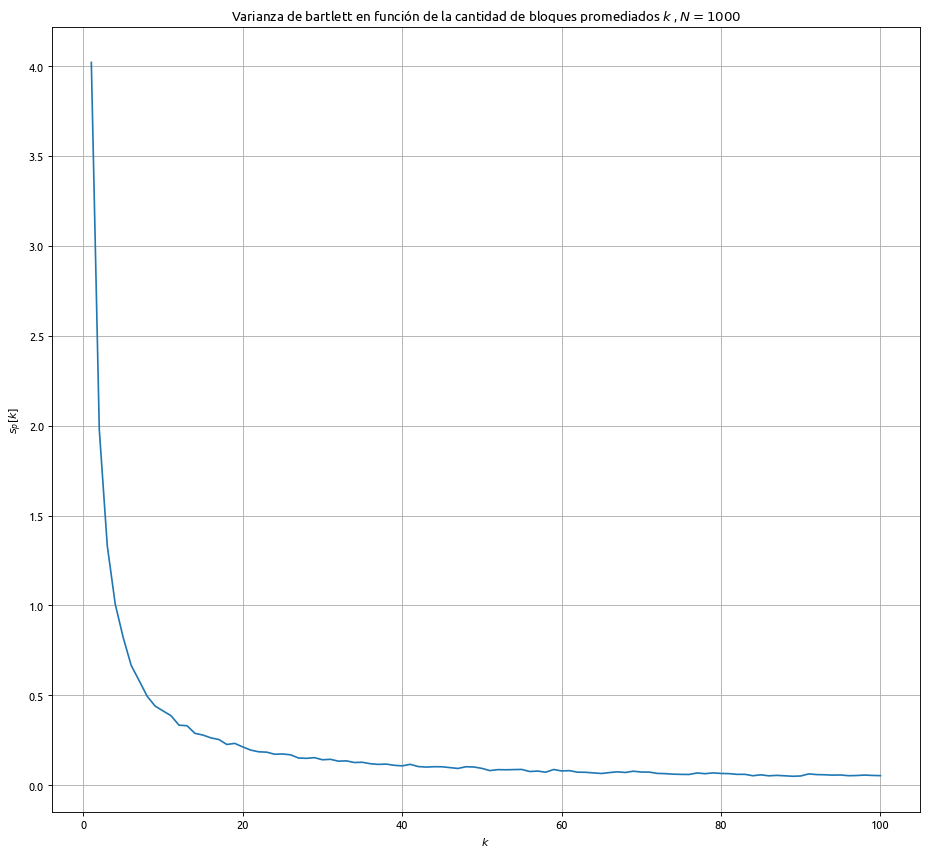

In [33]:
#Presentación gráfica de resultados
plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(k,varianzas)
plt.title('Varianza de bartlett en función de la cantidad de bloques promediados $k$ , $N = ' + str(N) + '$')
plt.ylabel('$s_{p}[k]$')
plt.xlabel('$k$')
plt.grid()
plt.show()

In [34]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados[::10], columns=['$v_b$', '$\Delta_{\Omega b}$'],index=k[::10])
HTML(df.to_html())

Del análisis de los resultados se ve que la varianza del estimador de Bartlett tiende a cero a medida que se incrementa la cantidad de bloques $K$ que se promedian (a $N$ constante):

\begin{equation}
\lim_{K\to\infty} v_{p} = \lim_{K\to\infty} \frac{1}{K}\sigma^{4} = 0 
\end{equation}

Por otra parte, se ve que a una cantidad de muestras $N$ constante la resolución espectral se ve reducida $K$ veces al aumentar la cantidad de bloques que se promedian respecto a la del periodograma, ya que se reduce el largo de cada bloque (debido a que $N$ se mantiene constante):

\begin{equation}
\Delta_{\Omega b} = K\frac{f_{s}}{N} = K\Delta_{\Omega p} 
\end{equation}

## Comparación con periodograma

En el siguiente experimento se genera una cantidad fija $S$ de realizaciones de ruido blanco gaussiano de varianza $\sigma^{2}$ y de $N$ muestras cada una. Para realizar la comparación se estima $\sigma^2$ usando el periodograma y el método de bartlett dividiendo cada realizacion en una cantidad fija de $k$ bloques disjuntos.

In [35]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion en el metodo de bartlett
k = 100

In [36]:
#Aca se almacenaran los resultados
tus_resultados = []

#Enciendo el generador de funciones
generador = gen.signal_generator(fs,N)

#Lista en que alamacenre las distribuciones para cada realizacion
dist = []

#Distribucion elegida para cada realizacion (todas normales)
for i in range(0,S):
    dist.append("normal")

#Media - Todas las realizaciones de media 0
u = np.zeros((S,1),dtype = float)

#Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
var = 2
s = np.sqrt(var)*np.ones((S,1),dtype = float)

#Llamo al metodo que genera ruido blanco
#Genera una matriz de NxS, donde N = Filas y S = Columnas
(t,x) = generador.noise(dist,u,s)

#Estimador periodograma
(fp,Sxm_p,Sxv_p) = sa.periodograma(x,fs)

#Estimador de bartlett
(fb,Sxm_b,Sxv_b) = sa.bartlett(x,fs,nsect = k)

#Calculo el area de eso
#TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
varianza_periodograma = (np.mean(Sxv_p))
varianza_bartlett = (np.mean(Sxv_b))

#Resolucion
resolucion_periodograma = fp[1] - fp[0]
resolucion_bartlett = fb[1] - fb[0]

#Almaceno los resultados para esta largo de señal
tus_resultados.append([str(varianza_periodograma),str(resolucion_periodograma)])
tus_resultados.append([str(varianza_bartlett),str(resolucion_bartlett)])

In [37]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$v$', '$\Delta_{\Omega}$'],index=['Periodograma','Bartlett'])
HTML(df.to_html())

De esto podemos concluir que para un mismo largo de señal $N$, la varianza del estimador de Bartlett se reduce $k$ veces respecto a la del periodograma:

\begin{equation}
v_{b} =\frac{1}{K}\sigma^{4} = \frac{1}{K}v_{p}
\end{equation}

Pero la resolución espectral aumenta k veces respecto al periodograma (ya que el largo $L$ de los bloques promediados es $k$ veces menor a $N$, el cual es el largo que toma el periodograma):

\begin{equation}
\Delta_{\Omega b} =K\frac{2\pi}{N} = \frac{2\pi}{L} = K \Delta_{\Omega p}
\end{equation}

<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

# Estimador periodograma de Welch

## En función de la ventana de registro N

En este experimento se genera una cantidad fija de $S$ realizaciones de ruido blanco gaussiano de varianza $\sigma^{2} = 2$. Se observa a que valores convergen el sesgo y la varianza del estimador periodograma de Bartlett al aumentar la cantidad de muestras $N$ y con una longitud fija de bloque $L = 16$ (es decir, la cantidad de bloques $K = \frac{N}{L}$ que se promedian aumenta con $N$).

In [38]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = np.arange(20,1221,dtype = int)

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 500

#Cantidad de bloques en los que se dividira cada realizacion
L = 16

#Overlap (50%)
solapamiento = 50

In [39]:
#Aca se almacenaran los resultados
tus_resultados = []
sesgos = np.zeros([np.size(N),],dtype = float)
varianzas = np.zeros([np.size(N),],dtype = float)
    
#Contador
j = 0

#Para cada largo de señal
for Ni in N:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,Ni)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza - Todas las realizaciones de desvio estandar de raiz de 2
    var = 2
    s = np.sqrt(var)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Realizo de forma matricial el modulo del espectro de todas las realizaciones
    (f,Sxm,Sxv) = sa.welch(x,fs,L,window = 'bartlett',overlap = solapamiento)

    #Calculo el area de ese espectro "promedio"
    #El area de la psd da la potencia
    valor_esperado = (np.mean(Sxm))
    sesgo = valor_esperado - np.power(s[0,0],2)


    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(sesgo),str(varianza)])

    #Sesgos
    sesgos[j] = sesgo

    #Varianzas
    varianzas[j] = varianza

    #Aumento el contador
    j = j + 1

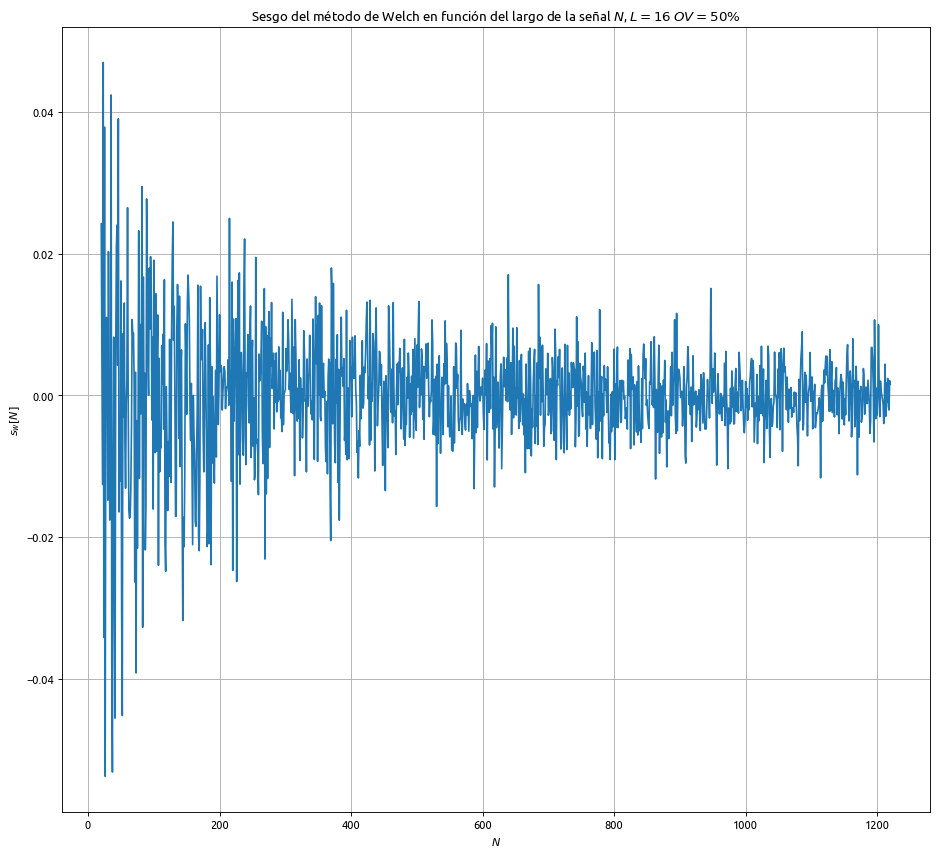

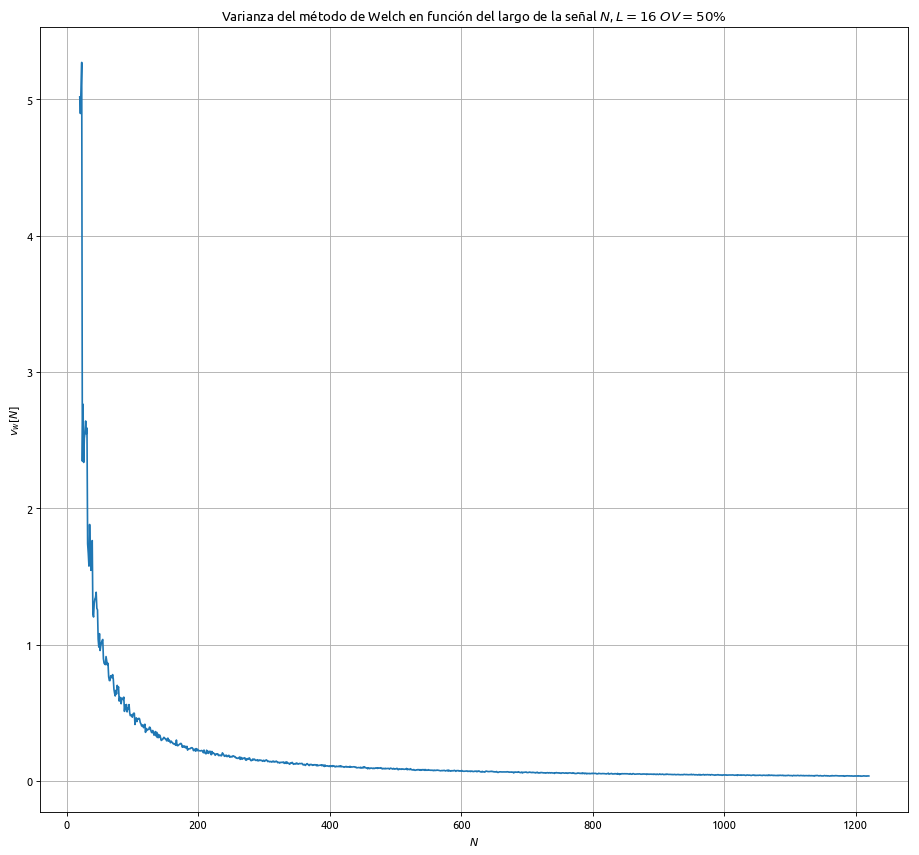

In [40]:
#Presentación gráfica de resultados
plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,sesgos)
plt.title('Sesgo del método de Welch en función del largo de la señal $N$, $L = ' + str(L) + '$ $OV = ' + str(solapamiento) + '\%$')
plt.ylabel('$s_{w}[N]$')
plt.xlabel('$N$')
plt.grid()
plt.show()

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(N,varianzas)
plt.title('Varianza del método de Welch en función del largo de la señal $N$, $L = ' + str(L) + '$ $OV = ' + str(solapamiento) + '\%$')
plt.ylabel('$v_{w}[N]$')
plt.xlabel('$N$')
plt.grid()

In [41]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados[::100], columns=['$s_w$', '$v_w$'],index=N[::100])
HTML(df.to_html())


Del análisis de los resultados se ve que el estimador de Welch es asintoticamente insesgado:

\begin{equation}
\lim_{N\to\infty} s_{w} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de muestras y manteniendo un el largo de los bloques promediados constante (es decir, aumentando la cantidad $K$ de bloques que se promedian a medida que se aumenta $N$) y permitiendo un solapamiento entre bloques del $50\%$, la varianza tiende a cero:

\begin{equation}
\lim_{N\to\infty} v_{w} = 0 
\end{equation}

De estas dos propiedades se puede concluir que Welch es un estimador consistente de la potencia de señal $\sigma^{2}$ a medida que aumenta $N$ y manteniendo el largo de bloque $L$ constante(es decir, aumentando la cantidad de bloques que se promedian).

## En función de la cantidad de bloques K 

En el siguiente experimento se genera una cantidad fija de realizaciones $S = 200$ de $N = 1000$ muestras de ruido blanco gaussiano de varianza $\sigma^{2}$. Se observa como varían la varianza y la resolución espectral a medida que se aumenta la cantidad de bloques $K$ en los que se divide cada realización.

In [42]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion
k = np.linspace(1,100,100,dtype = int)

In [43]:
#Aca se almacenaran los resultados
tus_resultados = []
resoluciones = np.zeros([np.size(k),],dtype = float)
varianzas = np.zeros([np.size(k),],dtype = float)

#Contador
j = 0

#Para cada largo de señal
for ki in k:

    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)

    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []

    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")

    #Media - Todas las realizaciones de media 0
    u = np.zeros((S,1),dtype = float)

    #Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
    s = np.sqrt(4)*np.ones((S,1),dtype = float)

    #Llamo al metodo que genera ruido blanco
    #Genera una matriz de NxS, donde N = Filas y S = Columnas
    (t,x) = generador.noise(dist,u,s)

    #Largo del bloque
    L = int(np.floor(N/ki))
    
    #Estimador periodograma
    (f,Sxm,Sxv) = sa.welch(x,fs,L,window = 'bartlett',overlap = solapamiento)
    
    #Calculo el area de eso
    #TODO: Tengo un error de escala con esto. DETECTAR la fuente del problema
    varianza = (np.mean(Sxv))

    #Resolucion
    resolucion = f[1] - f[0]
    
    #Almaceno los resultados para esta largo de señal
    tus_resultados.append([str(varianza),str(resolucion)])
    
    #Varianzas
    varianzas[j] = varianza

    #Resoluciones
    resoluciones[j] = resolucion
    
    #Aumento el contador
    j = j + 1

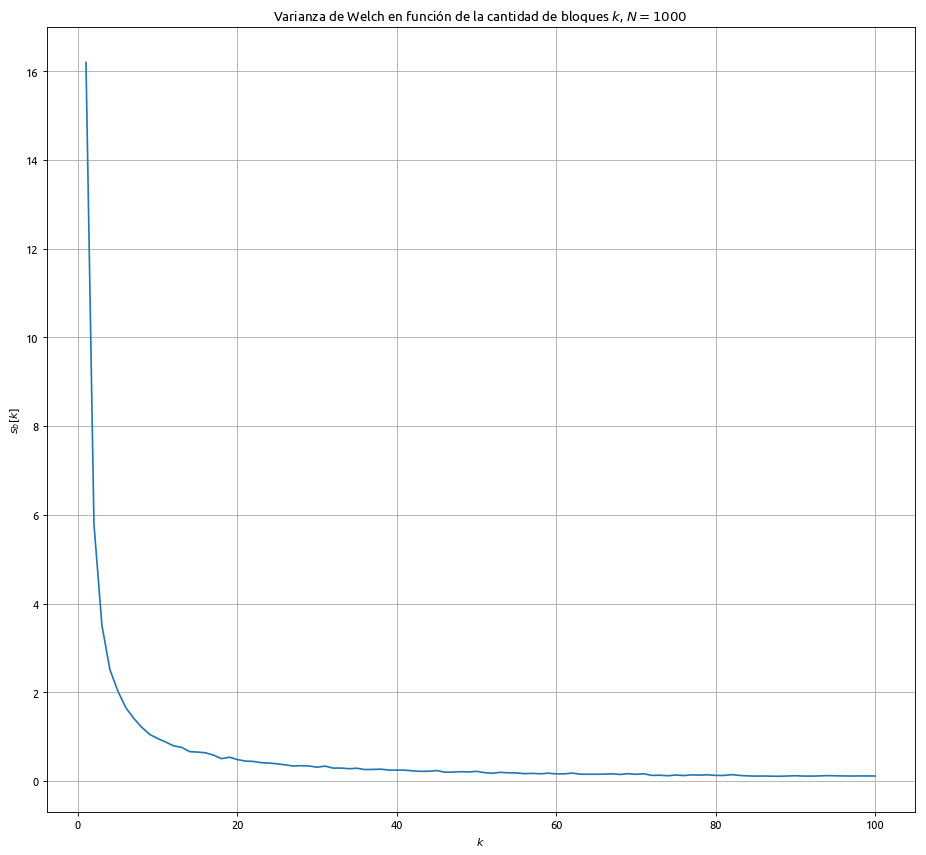

In [44]:
#Presentación gráfica de resultados
plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.plot(k,varianzas)
plt.title('Varianza de Welch en función de la cantidad de bloques $k$, $N = ' + str(N) + '$')
plt.ylabel('$s_{b}[k]$')
plt.xlabel('$k$')
plt.axis('tight')
plt.grid()

In [45]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados[::10], columns=['$s_w$', '$\Delta_{\Omega w}$'],index=k[::10])
HTML(df.to_html())

Del análisis de los resultados se ve que la varianza del estimador de Bartlett tiende a cero a medida que se incrementa la cantidad de bloques $K$ (a $N$ constante):

\begin{equation}
\lim_{K\to\infty} v_{w} = \lim_{K\to\infty} \frac{9}{16}\frac{1}{K}\sigma^{4} = 0 
\end{equation}

Por otra parte, se ve que al aumentar la cantidad de bloques promediados (y mantener $N$ constante) la resolución espectral se reduce debido a que el largo $L$ de cada bloque se reduce.

## Comparación con periodograma de Bartlett

En el siguiente experimento se genera una cantidad fija $S$ de realizaciones de ruido blanco gaussiano de varianza $\sigma^{2}$ y de $N$ muestras cada una. Para realizar la comparación se estima $\sigma^2$ usando el periodograma de Bartlett con una cantidad fija de $k$ bloques disjuntos con una longitud de $L = \frac{N}{k}$ y el periodograma de Welch con una longitud de bloques $L$ y un solapamiento de $50%$ entre los mismos. 

In [46]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#Cantidad de bloques en los que se dividira cada realizacion en el metodo de bartlett
k = 100

In [47]:
#Aca se almacenaran los resultados
tus_resultados = []

#Enciendo el generador de funciones
generador = gen.signal_generator(fs,N)

#Lista en que alamacenre las distribuciones para cada realizacion
dist = []

#Distribucion elegida para cada realizacion (todas normales)
for i in range(0,S):
    dist.append("normal")

#Media - Todas las realizaciones de media 0
u = np.zeros((S,1),dtype = float)

#Varianza = 2 - Todas las realizaciones de desvio estandar de raiz de 2
var = 2
s = np.sqrt(var)*np.ones((S,1),dtype = float)

#Llamo al metodo que genera ruido blanco
#Genera una matriz de NxS, donde N = Filas y S = Columnas
(t,x) = generador.noise(dist,u,s)

#Estimador de bartlett
(fb,Sxm_b,Sxv_b) = sa.bartlett(x,fs,nsect = k)

L = int(np.floor(N/k))

#Estimador de welch
(fw,Sxm_w,Sxv_w) = sa.welch(x,fs,L,window = 'bartlett',overlap = 50)

#Calculo el area de eso
varianza_bartlett = (np.mean(Sxv_b))
varianza_welch = (np.mean(Sxv_w))

#Resolucion
resolucion_bartlett = fb[1] - fb[0]
resolucion_welch = fw[1] - fw[0]

#Almaceno los resultados para esta largo de señal
tus_resultados.append([str(varianza_bartlett),str(resolucion_bartlett)])
tus_resultados.append([str(varianza_welch),str(resolucion_welch)])

In [48]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$v$', '$\Delta_{\Omega}$'],index=['Bartlett','Welch'])
HTML(df.to_html())

De esto podemos concluir que para un mismo largo de señal $N$ y un mismo largo de bloques $L = \frac{N}{k}$,en donde $k$ es la cantidad de bloques disjuntos en el método de Bartlett, se tiene que para el método de Welch con un solapamiento del $50\%$ la varianza se reduce casi a la mitad:

\begin{equation}
v_{w} \approx \frac{9}{16K}\sigma^{4} = \frac{9}{16}v_{b}
\end{equation}

Esto se debe a que permitir un solapamiento del $50\%$ hace que se tenga casi el doble de bloques para promediar.

Además se observa que, para este experimento, la resolución espectral se mantiene constante para ambos métodos ya que el largo de bloque es el mismo(recordando que $\Delta_{\Omega w} = \frac{2\pi}{L}$):

\begin{equation}
\Delta_{w} = \frac{2\pi}{L} = \Delta{b}
\end{equation}

<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

Primero se realiza el experimento utilizando el Método de Welch con solapamiento del $50%$ y con $K = 4$ y se estudia como varian los parámetros del estimador en función de la $SNR$. En el experimento se aplica el estimador al resultado de aplicar el método a cada realización, de donde se obtiene la estimación de frecuencia para cada realización. A partir de ese vector se obtiene el valor esperado y la varianza. Tanto los valores de sesgo y varianza estan normalizados respecto a la resolución espectral.

In [82]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#SNRs para las que se realizara la simulacion
SNR = np.array([ 3, 10, 15, 20], dtype=np.float)

In [97]:
tus_resultados = []
var_w = []
espectros = []

for SNRi in SNR:
    
    #Parametros de la señal x1
    a1 = np.sqrt(2)
    A1 = a1*np.ones((S,1),dtype = float)
    p1 = 0
    P1 = p1*np.ones((S,1),dtype = float)
    fo = np.pi/2

    #Limites de la distribucion uniforme de fr
    linf = -0.5*((2*np.pi)/N)
    lsup = 0.5*((2*np.pi)/N)
    
    #Fr sera una variable aleatoria de distribucion uniforme entre -1/2 y 1/2
    #Genero 200 realizaciones de fr
    fr = np.random.uniform(linf,lsup,S).reshape(S,1)
    
    #Genero 200 realizaciones de f1
    F1 = fo + fr
    
    k = 10
    L = int(np.floor(N/k))
    
    #Parametros del ruido(distribucion normal)
        
    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []
    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")    
    #Media - Todas las realizaciones de media 0
    u = 0
    U = u*np.ones((S,1),dtype = float)
    #Varianza - Se setea en funcion de snr,que indica cuantos db por debajo
    #quiero que este de x1
    var = (L)*(np.power(a1,2)/2)*(np.power(10,-(SNRi/10)))
    SD = np.sqrt(var)*np.ones((S,1),dtype = float)
    
    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)
    
    #Genero S realizaciones de x
    (t,x1) = generador.sinewave(A1,F1,P1,freq = 'normalized_frequency')
    
    #Genero S realizaciones de n
    (t,n) = generador.noise(dist,U,SD)
    
    #Genero S realizaciones de x = x1 + n
    x = x1 + n
        
    #Obtengo la psd para cada una de las realizaciones
    #Seteo el parametro ensemble para que me devuelva todas las realizaciones en Sxm
    (f,Sxm,Sxv) = sa.welch(x,fs,L,window = 'bartlett',overlap = 50,ensemble = True)
    
    espectros.append([Sxm])
    
    #Aplico el estimador de frecuencia central
    #Calculo el sesgo
    df = f[1] - f[0]
    fo_welch = df*(np.argmax(Sxm,axis = 0))
    fo_welch_valor_esperado = np.mean(fo_welch)
    sesgo_fo_welch = (fo_welch_valor_esperado - fo)
    varianza_fo_welch = np.var(fo_welch)
        
    #Se almacenan los parametros en resultados
    var_w.append(varianza_fo_welch)
    tus_resultados.append([str(sesgo_fo_welch),str(varianza_fo_welch)])

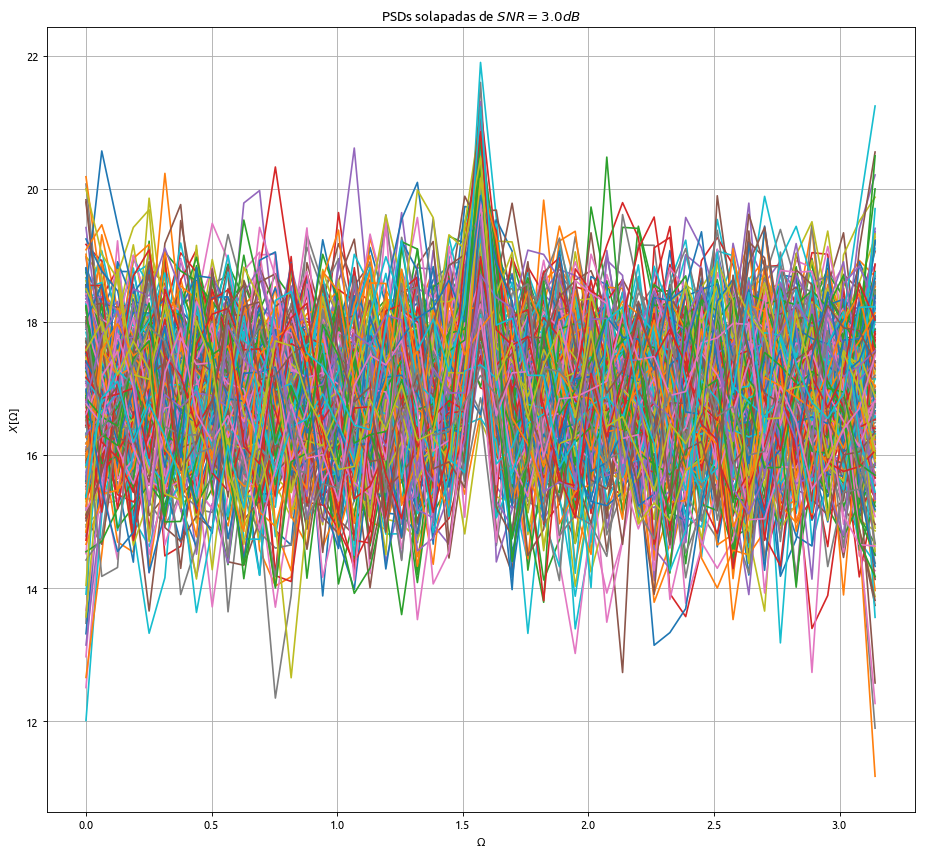

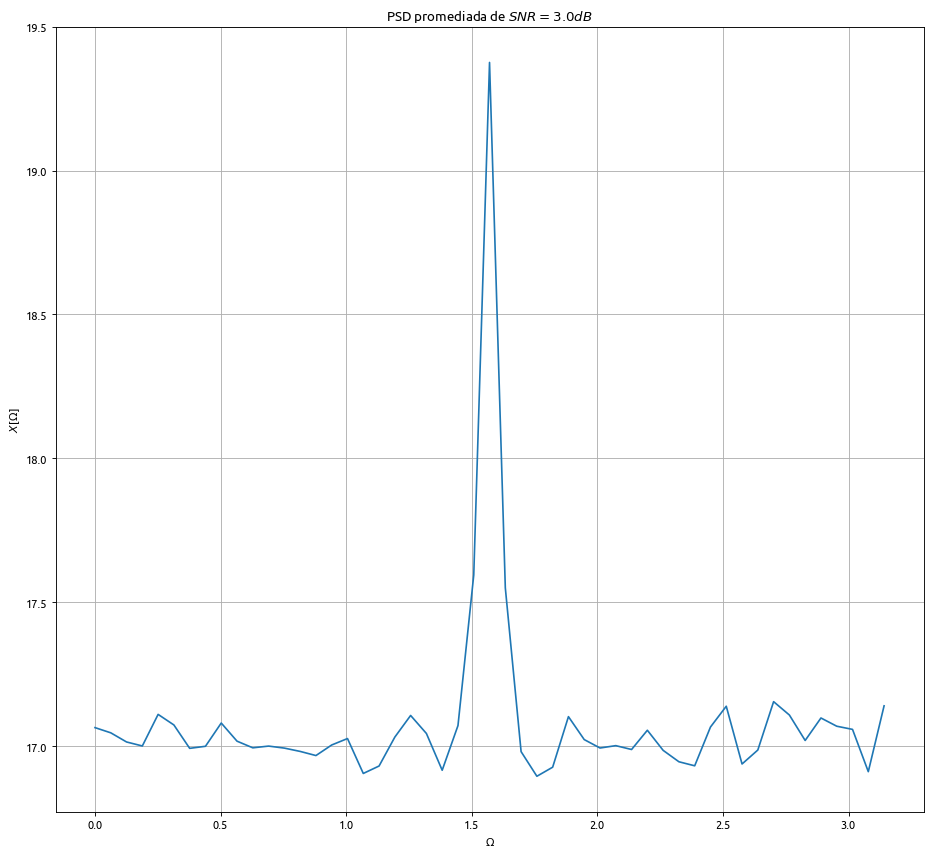

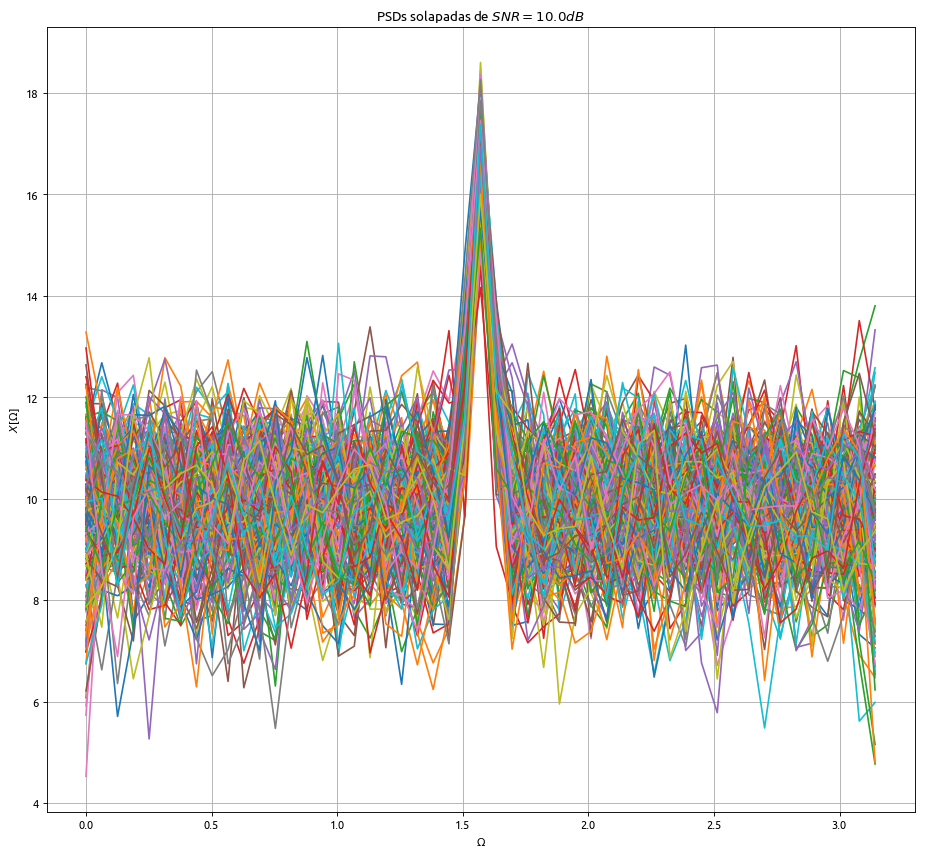

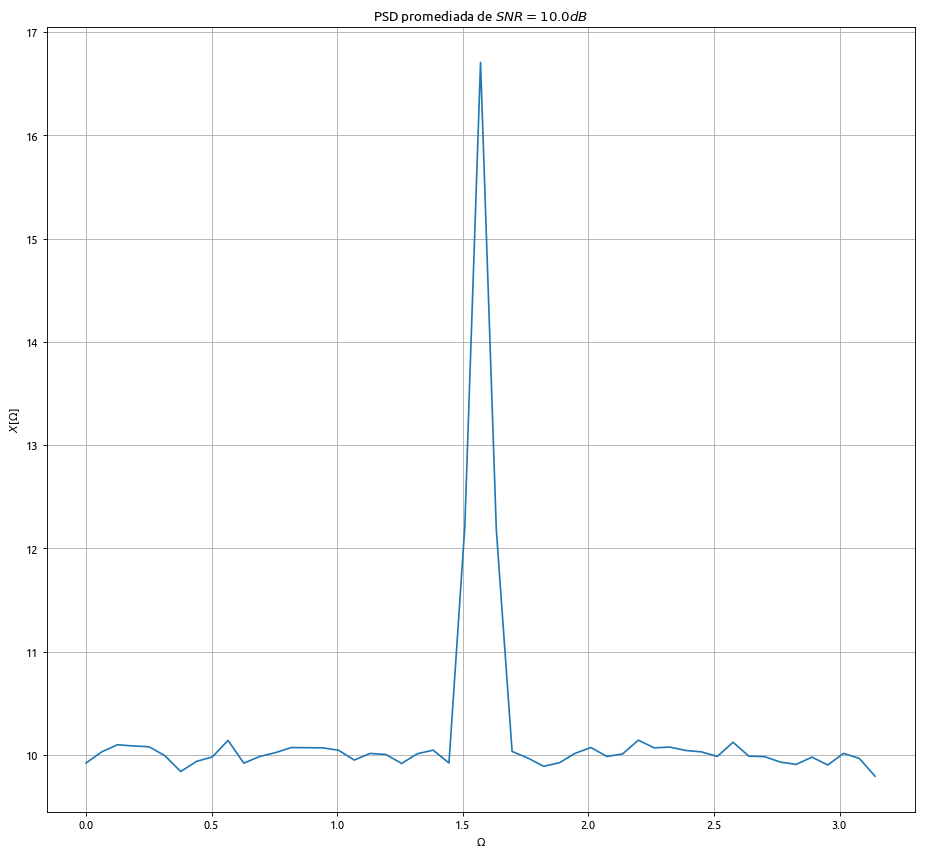

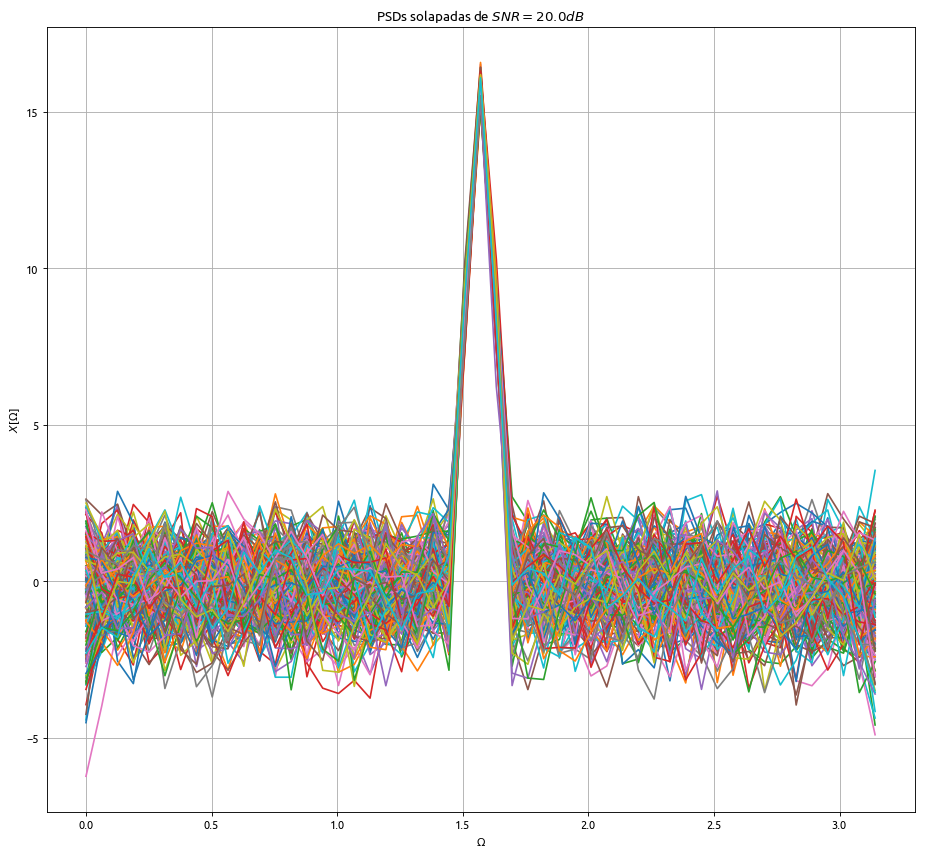

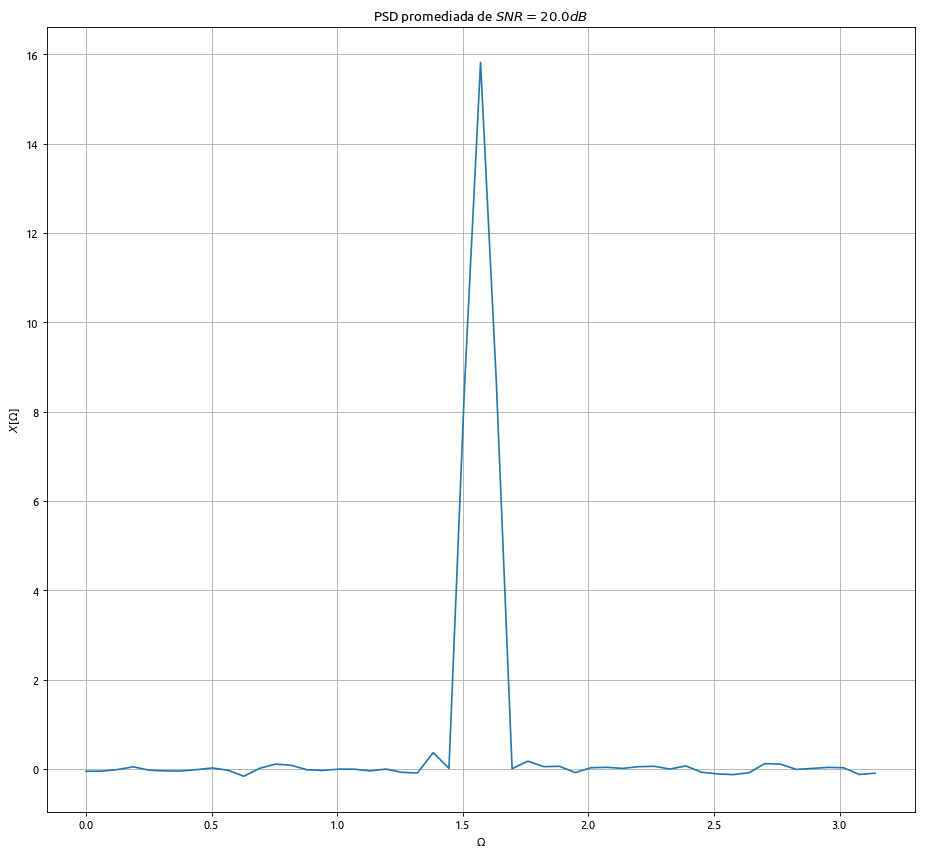

In [102]:
#Presentación gráfica de resultados

for SNRi,espectros_i in zip(SNR,espectros):
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(f,10*np.log10(espectros_i[0]))
    #plt.title('PSDs solapadas de $' + str(S) + '$ realizaciones de $A_{1} = ' + str(a1) + '$ y $SNR = ' + str(SNRi) + '$')
    plt.title('PSDs solapadas de $SNR = ' + str(SNRi) + 'dB$')
    plt.ylabel('$X[\Omega]$')
    plt.xlabel('$\Omega$')
    plt.axis('tight')
    plt.grid()

    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(f,10*np.log10(np.mean(espectros_i[0],axis = 1)))
    #plt.title('PSD promediada de $' + str(S) + '$ realizaciones de $A_{1} = ' + str(a1) '$ y $SNR = ' + str(SNRi) + '$')
    plt.title('PSD promediada de $SNR = ' + str(SNRi) + 'dB$')
    plt.ylabel('$X[\Omega]$')
    plt.xlabel('$\Omega$')
    plt.axis('tight')
    plt.grid()

In [103]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_{\hat{\Omega}_1^W}$', '$v_{\hat{\Omega}_1^W}$'],index=SNR)
HTML(df.to_html())

Se observa que el estimador presenta un mayor rendimiento de sesgo y varianza cuando la $SNR$ es mayor, lo cual es esperable ya que la componente senoidal se destaca más por encima del piso de ruido.

   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se ha elegido el método de Blackman-Tuckey. Este metodo se basa en multiplicar a la secuencia de autocorrelacion de la señal por una ventana de forma de mejorar la estimacion de la secuencia de autocorrelacion.
</div>

In [111]:
import spectrum as sp

Se realiza el experimento utilizando el Método de Blackman-Tuckey y se estudia como varian los parámetros del estimador en función de la $SNR$. En el experimento se aplica el estimador al resultado de aplicar el método a cada realización, de donde se obtiene la estimación de frecuencia para cada realización. A partir de ese vector se obtiene el valor esperado y la varianza. Tanto los valores de sesgo y varianza estan normalizados respecto a la resolución espectral.

In [148]:
###############################
# Parámetros de la simulación #
###############################

#Parametros del muestreo
N = 1000

#Frecuencias de muestreo
fs = 1000

#Cantidad de realizaciones
S = 200

#SNRs para las que se realizara la simulacion
SNR = np.array([3,10,15,20], dtype=np.float)

In [149]:
tus_resultados = []
var_b = []
espectros = []

for SNRi in SNR:
    
    #Parametros de la señal x1
    a1 = np.sqrt(2)
    A1 = a1*np.ones((S,1),dtype = float)
    p1 = 0
    P1 = p1*np.ones((S,1),dtype = float)
    fo = np.pi/2

    #Limites de la distribucion uniforme de fr
    linf = -0.5*((2*np.pi)/N)
    lsup = 0.5*((2*np.pi)/N)
    
    #Fr sera una variable aleatoria de distribucion uniforme entre -1/2 y 1/2
    #Genero 200 realizaciones de fr
    fr = np.random.uniform(linf,lsup,S).reshape(S,1)
    
    #Genero 200 realizaciones de f1
    F1 = fo + fr
    
    #Parametros del ruido(distribucion normal)
        
    #Lista en que alamacenre las distribuciones para cada realizacion
    dist = []
    #Distribucion elegida para cada realizacion (todas normales)
    for i in range(0,S):
        dist.append("normal")    
    #Media - Todas las realizaciones de media 0
    u = 0
    U = u*np.ones((S,1),dtype = float)
    #Varianza - Se setea en funcion de snr,que indica cuantos db por debajo
    #quiero que este de x1
    var = (N)*(np.power(a1,2)/2)*(np.power(10,-((SNRi + 10)/10)))
    #var = np.power(10,(-snr/10))
    SD = np.sqrt(var)*np.ones((S,1),dtype = float)
    
    #Enciendo el generador de funciones
    generador = gen.signal_generator(fs,N)
    
    #Genero S realizaciones de x
    (t,x1) = generador.sinewave(A1,F1,P1,freq = 'normalized_frequency')
    
    #Genero S realizaciones de n
    (t,n) = generador.noise(dist,U,SD)
    
    #Genero S realizaciones de x = x1 + n
    x = x1 + n
    
    fo_blackman = np.zeros((S,),dtype = float)
    
    Sx = np.zeros((int((N/2)+1),S),dtype = float)
    #Se aplica el correlograma a cada realizacion (la funcion no acepta una matriz)
    for i in range(0,S):
        p = sp.pcorrelogram(x[:,i], lag=100, NFFT=N, scale_by_freq=True,sampling = (2*np.pi))
        psd = p.psd
        df = p.df
        Sxx = 10*np.log10(np.abs(psd/np.max(psd)))
        Sx[:,i] = np.abs(psd/np.max(psd))
        fo_blackman[i] = p.df*(np.argmax(Sxx))
    
    espectros.append([Sx])
    
    fo_valor_esperado_blackman = np.mean(fo_blackman)
    sesgo_fo_blackman = (fo_valor_esperado_blackman - fo)
    varianza_fo_blackman = np.var(fo_blackman)
        
    #Se almacenan los parametros en resultados
    var_b.append(varianza_fo_blackman)
    tus_resultados.append([str(sesgo_fo_blackman),str(varianza_fo_blackman)])

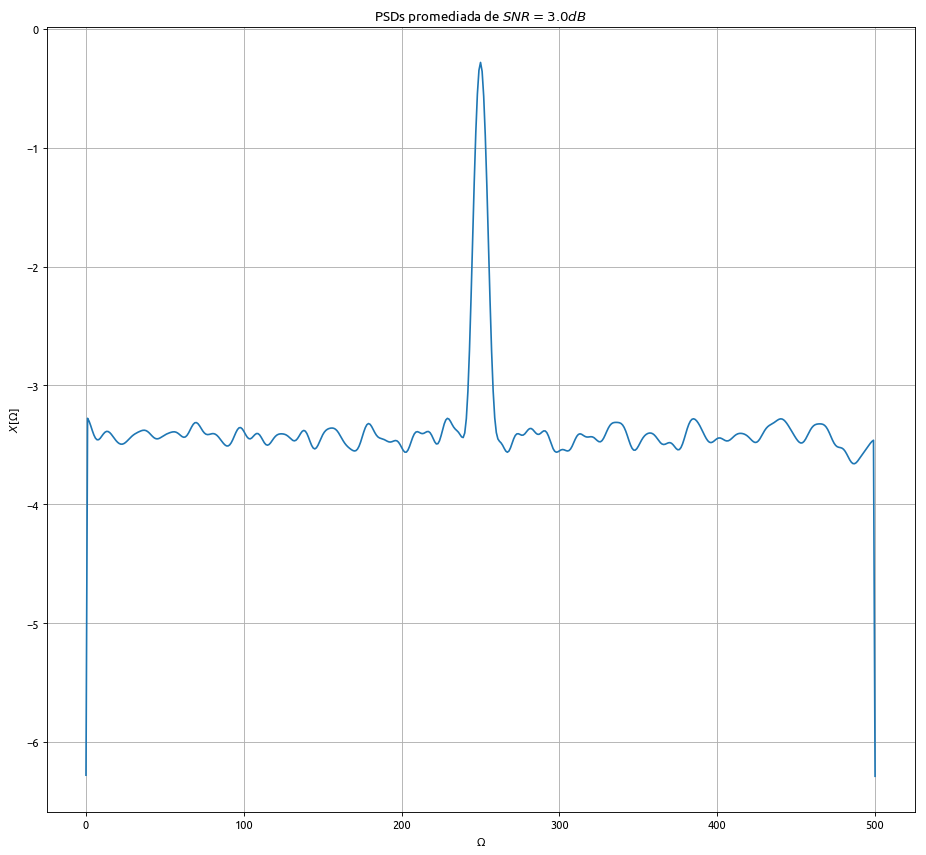

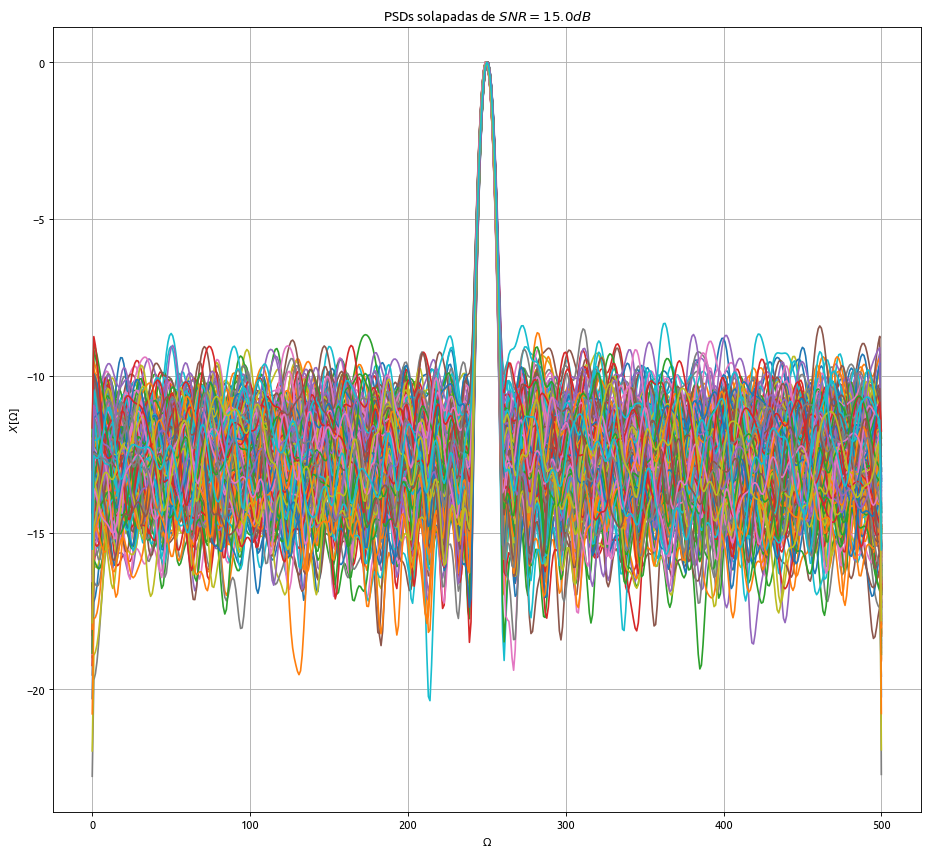

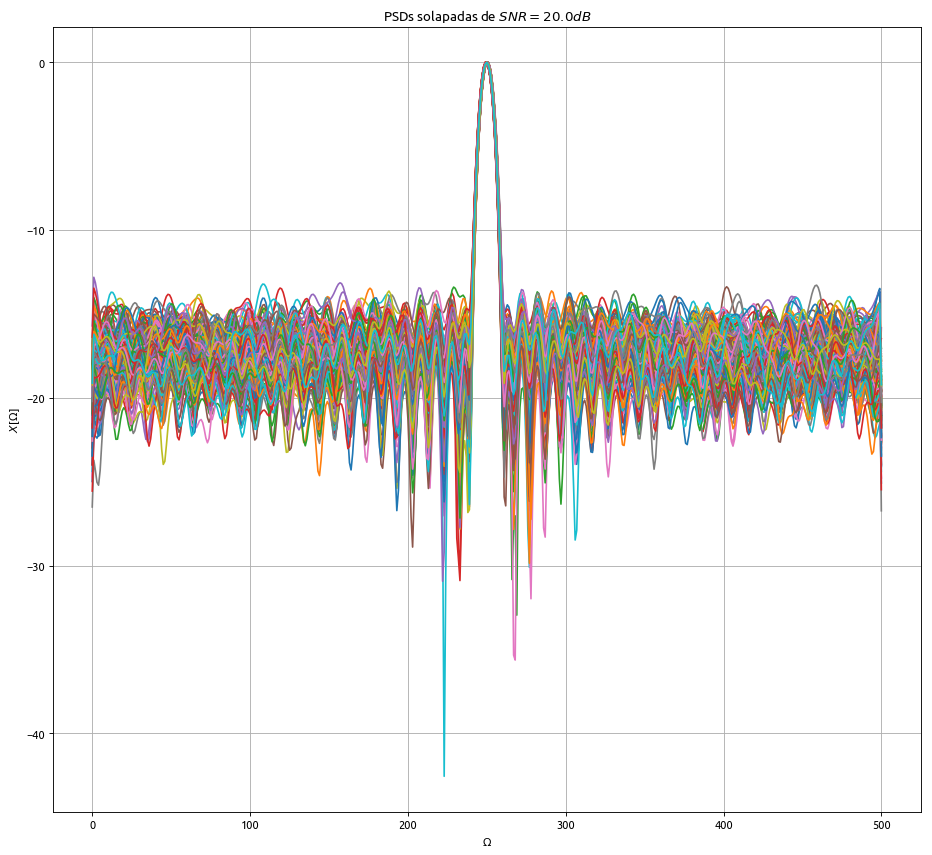

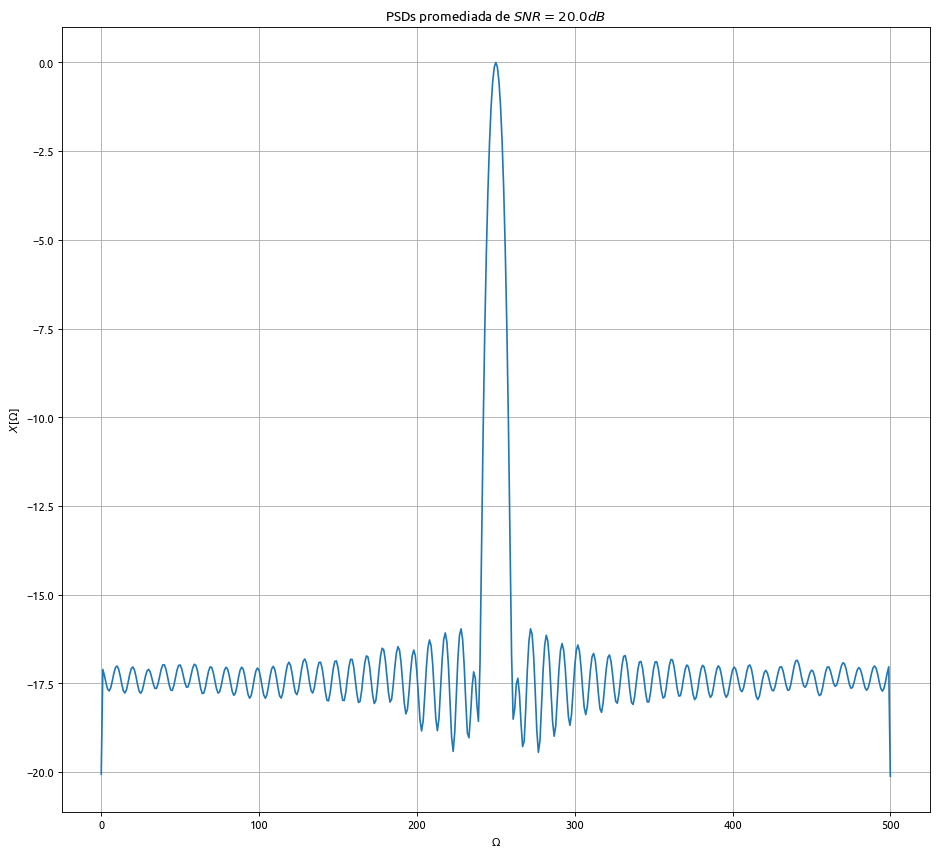

In [150]:
for SNRi,espectros_i in zip(SNR,espectros):
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(10*np.log10(espectros_i[0]))
    plt.title('PSDs solapadas de $SNR = ' + str(SNRi) + 'dB$')
    plt.ylabel('$X[\Omega]$')
    plt.xlabel('$\Omega$')
    plt.axis('tight')
    plt.grid()

    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(10*np.log10(np.mean(espectros_i[0],axis = 1)))
    plt.title('PSDs promediada de $SNR = ' + str(SNRi) + 'dB$')
    plt.ylabel('$X[\Omega]$')
    plt.xlabel('$\Omega$')
    plt.axis('tight')
    plt.grid()

In [151]:
#######################################
# Tu simulación que genere resultados #
#######################################

df = DataFrame(tus_resultados, columns=['$s_{\hat{\Omega}_1^B}$', '$v_{\hat{\Omega}_1^B}$'],index=SNR)
HTML(df.to_html())

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Un indicador apropiado seria la varianza del estimador.
</div>

In [152]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = []

for var_wi,var_bi in zip(var_w,var_b):
    tus_resultados.append([str(var_wi),str(var_bi)])

df = DataFrame(tus_resultados, columns=['$i_W$', '$i_B$'],index=SNR)
HTML(df.to_html())


Se observa que el metodo de Blackman-Tuckey tiene menor varianza a la hora de estimar la frecuencia de una senoidal con ruido incorrelado (el caso importante es el de $3 dB$)